known: all data + parameter  
unknown:   
result_record: https://outlookuga-my.sharepoint.com/:x:/g/personal/yq88347_uga_edu/EZabROaVeP9DoeRC_CEY-QABRXk6YPmp_oNhKu0h8MM0uQ

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow as tf
import src.models_tf as models

In [153]:
# data = sio.loadmat("test.mat")
# data = sio.loadmat("data.mat")
data = sio.loadmat("data/data_2k_points.mat")
c0 = data["IC"]
t = data["t"]
c_ref = data["y"]

t_train = t

# scale = np.array(
#     [10, 1, 100, 100, 0.001, 10, 0.1, 1000]
# ).reshape([-1])
scale = np.array(
    [10, 1, 100, 100, 0.0001, 10, 0.1, 1000]
).reshape([-1])
c_ref = c_ref / scale
c0 = c0 / scale

In [154]:
# time span
np.max(t)

100.0

In [155]:
len(t)

2000

In [156]:
np.max(data["y"], axis=0)

array([2.99999999e+01, 3.54115121e+00, 8.57923329e+02, 1.00000000e+03,
       1.13698673e-03, 3.83874944e+01, 8.68819961e-01, 2.16923077e+03])

In [157]:
model = models.PINN(
    c0=c0,
    output_dim=8,
    scale=scale,
    units=100, 
    activation=tf.tanh,
    eps=1,
)

In [158]:
t_ode = t_train[::10]
t_u = t_train
u = c_ref
loss, ode_loss, data_loss, min_loss = model.train(t_ode, t_u, u, niter=30000)

0 3.1910765 0.000161461 3.190915
1000 0.006686614 4.234057e-05 0.006644273
2000 0.0011384233 6.1206147e-06 0.0011323027
3000 0.0004674763 1.9614513e-06 0.00046551484
4000 0.00024602507 6.7027695e-06 0.00023932231
5000 0.000115020965 6.3523015e-07 0.00011438574
6000 0.000515242 3.1294092e-06 0.0005121126
7000 0.0009622272 3.3491845e-06 0.00095887796
8000 2.397578e-05 2.418741e-07 2.3733905e-05
9000 1.6026741e-05 1.3652901e-07 1.5890211e-05
10000 1.3736807e-05 2.7076695e-07 1.346604e-05
11000 0.0011510686 2.4118954e-06 0.0011486567
12000 5.4497457e-05 3.618866e-07 5.413557e-05
13000 5.4259986e-06 1.2283473e-07 5.303164e-06
14000 4.210846e-06 1.5824621e-07 4.0525997e-06
15000 3.772641e-05 2.9503096e-07 3.7431382e-05
16000 0.00015219189 6.527765e-07 0.00015153912
17000 6.6023676e-06 1.0780201e-07 6.4945657e-06
18000 4.8698334e-06 8.1822236e-08 4.788011e-06
19000 0.00019798148 7.356906e-06 0.00019062457
20000 0.00012211324 1.133632e-05 0.00011077691
21000 4.4209637e-06 1.249775e-07 4.295986

In [159]:
min_loss

1.1458189e-06

In [160]:
model.restore()
c_pred = model.call(
    tf.constant(t_train, tf.float32),
)

In [161]:
L2 = np.sqrt(np.sum((c_pred - c_ref) ** 2, axis=0) / np.sum(c_ref ** 2, axis=0))

In [162]:
L2

array([0.00030999, 0.00357094, 0.00132539, 0.00040915, 0.00120826,
       0.00343926, 0.000786  , 0.00026231])

In [163]:
# k1 = 2.82
print(tf.math.exp(model.log_k1))

tf.Tensor(2.8203902, shape=(), dtype=float32)


In [164]:
print(tf.math.exp(model.log_k_apc))

tf.Tensor(1.0, shape=(), dtype=float32)


In [165]:
print(tf.math.exp(model.log_k8))

tf.Tensor(1.0, shape=(), dtype=float32)


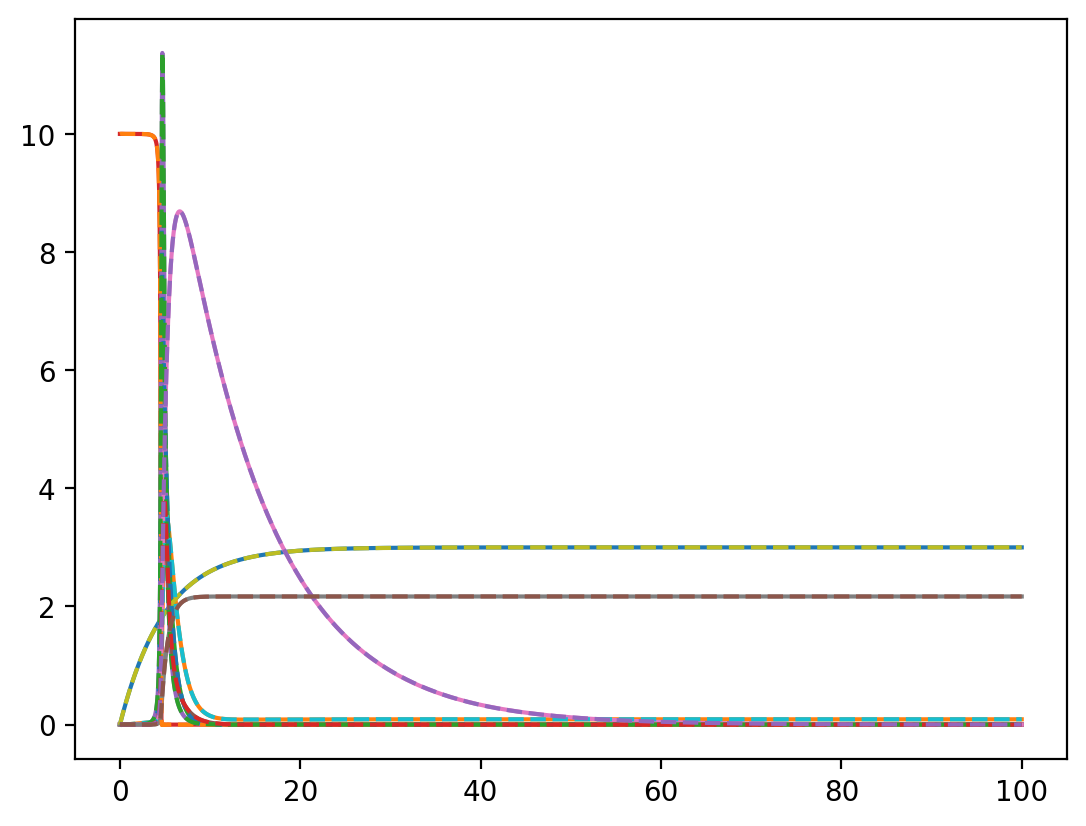

In [166]:
plt.figure(dpi=200)
plt.plot(t_train, c_ref, "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, c_pred, "--", label="prediction")
# plt.legend()
plt.show()

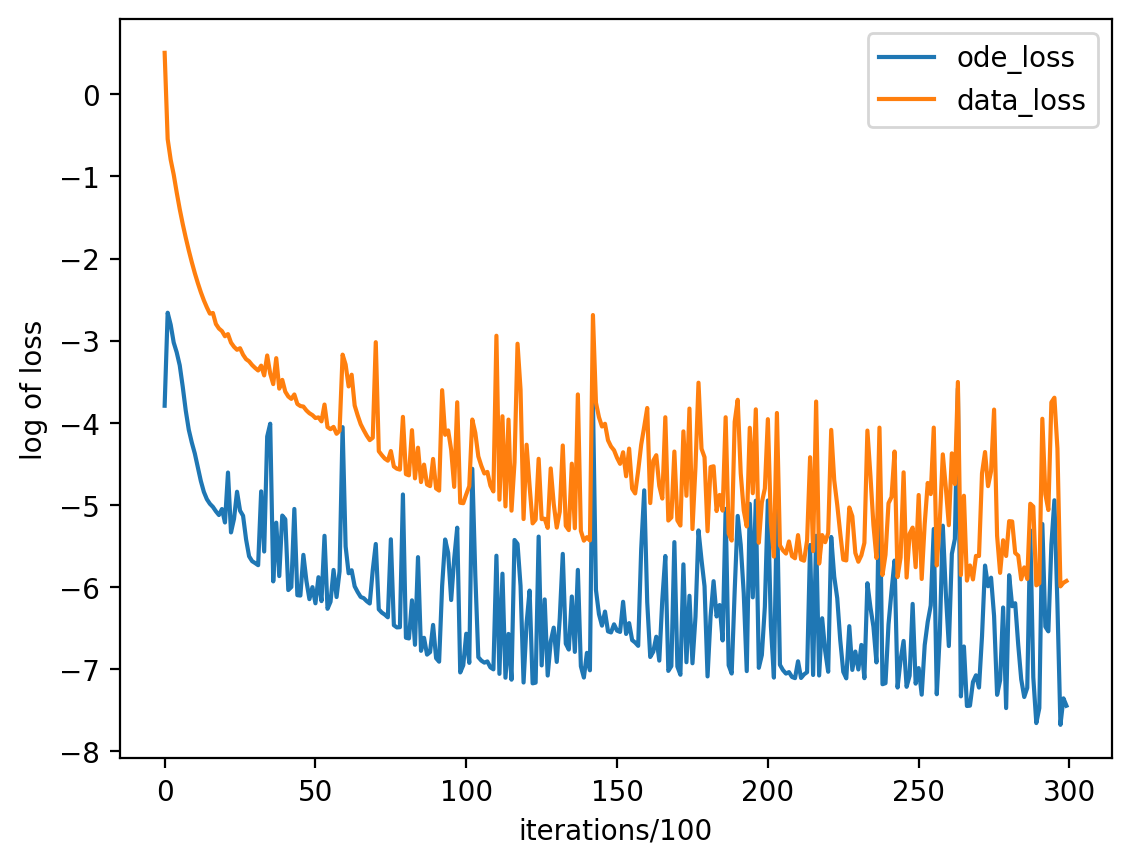

In [167]:
plt.figure(dpi=200)
plt.plot(np.log10(ode_loss)[::100], "-", label="ode_loss")
plt.plot(np.log10(data_loss)[::100], "-", label="data_loss")
# plt.plot(np.log(loss), "-", label="loss")
plt.xlabel('iterations/100')
plt.ylabel('log of loss')
plt.legend()
plt.show()

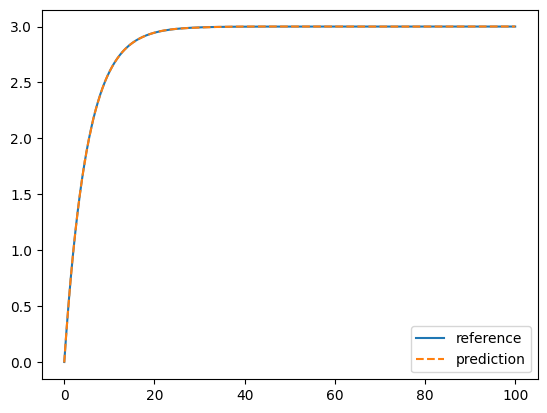

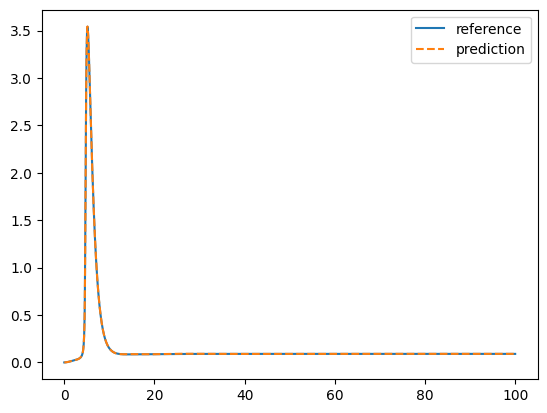

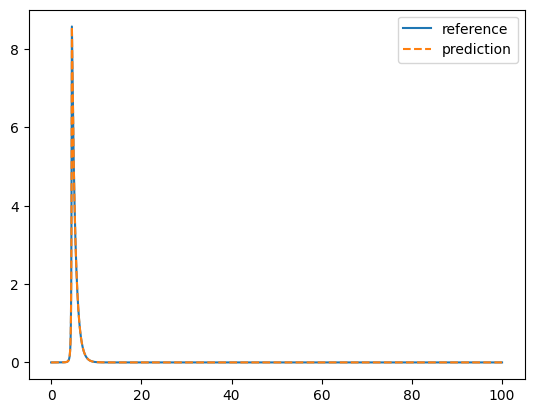

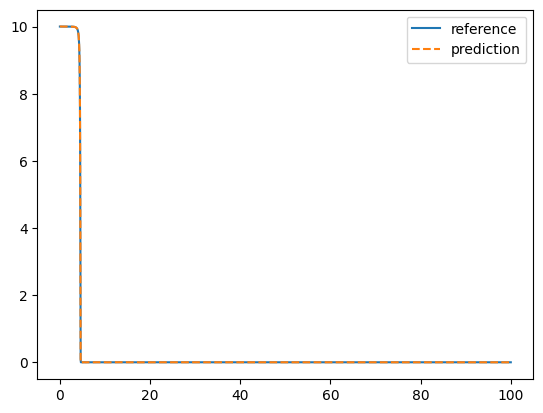

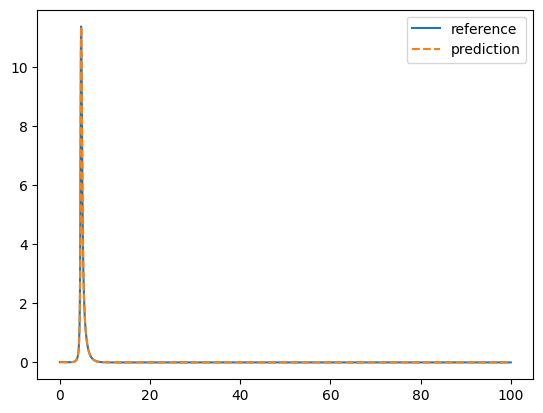

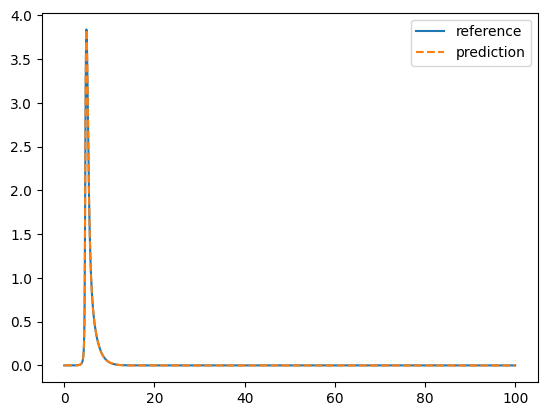

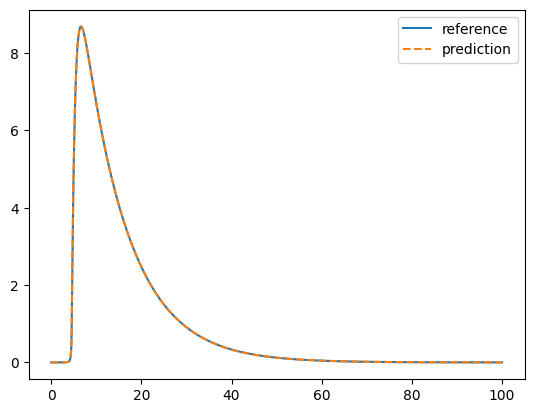

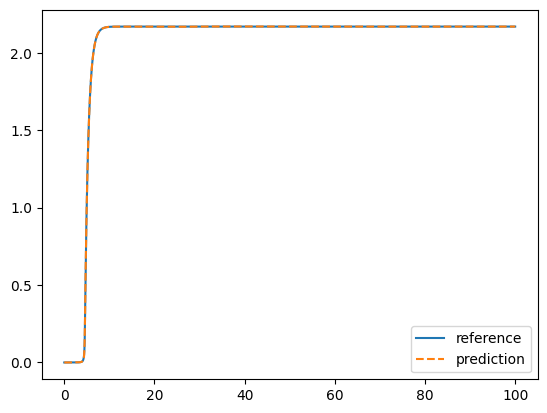

In [168]:
plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 0:1], "-", label="reference")
plt.plot(t_train, c_pred[:, 0:1], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 1:2], "-", label="reference")
plt.plot(t_train, c_pred[:, 1:2], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 2:3], "-", label="reference")
plt.plot(t_train, c_pred[:, 2:3], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 3:4], "-", label="reference")
plt.plot(t_train, c_pred[:, 3:4], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 4:5], "-", label="reference")
plt.plot(t_train, c_pred[:, 4:5], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 5:6], "-", label="reference")
plt.plot(t_train, c_pred[:, 5:6], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 6:7], "-", label="reference")
plt.plot(t_train, c_pred[:, 6:7], "--", label="prediction")
plt.legend()
plt.show()

plt.figure(dpi=100)
plt.plot(t_train, c_ref[:, 7:8], "-", label="reference")
plt.plot(t_train, c_pred[:, 7:8], "--", label="prediction")
plt.legend()
plt.show()